LMS EXP 08_Aiffel
<br/>**8. 카메라 스티커앱 만들기 첫걸음**

라이브러리
<br/>데이터 정보
<br/>데이터 탐색
<br/>데이터 시각화
<br/>데이터 전처리
* a

얼굴 검출. 랜드마크 검출
<br/>스티커 적용 위치 확인
<br/>스티커 적용
<br/>결론
<br/>참고문헌

#라이브러리

In [ ]:
import cv2
import dlib
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

**cv2**는 openCV(Open Source Computer Vision Library)를 불러온다.
<br/>openCV는 계산 효율성과 실시간 처리에 중점을 둔 컴퓨터 비전 라이브러리이다.
<br/>물체 인식, 얼굴 인식, 제스처 인식, 자율주행 자동차, OCR 판독기, 불량 검사기 등에 활용한다.

**dlib**는 이미지 처리 및 기계 학습을 하는 c++ 로 개발된 고성능의 라이브러리이다. 얼굴인식에 특화돼있다.

**numpy**는 array 단위로 벡터와 행렬을 계산한다.

**os(Operating System)**는 운영체제에서 제공되는 여러 기능을 파이썬에서 수행한다. <br/>예를 들어, 파일 복사, 디렉터리 생성, 파일 목록을 구할 수 있다.

**matplotlib**은 다양한 데이터와 학습 모델을 시각화한다.

In [ ]:
print(cv2.__version__)
print(dlib.__version__)
print(np.__version__)
print(matplotlib.__version__)

4.1.2
19.18.0
1.21.6
3.2.2


**모듈 버전 확인**

모듈이 업데이트 되면서 새로운 기능이 추가되고 이전 기능이 삭제되는
<br/>변경 사항을 인식하지 못하면 에러가 발생할 수 있다.
<br/>따라서 모듈의 버전을 확인하는 것은 중요하다.



특정 모듈과 관련된 에러가 난다면 새로운 버전의 모델을 재설치한다.
>pip uninstall untitled_modul
><br/>pip install untitled_modul

Github에서 라이브러리나 프레임워크의 버전을 표시한다면
<br/>코드를 공유하는 과정에서 모듈 에러를 방지할 수 있는 정보를 제공한다.

#데이터 정보


[CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html)

[고양이 수염 이미지](https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1)

flaticon 사이트에서 공유하는 고양이 수염 이미지이다.

#데이터 탐색


#데이터 시각화


#데이터 전처리



#얼굴 검출. 랜드마크 검출

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


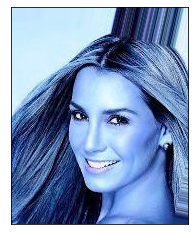

In [ ]:
my_image_path = '/content/drive/MyDrive/LMS/celebA(test)/000001.jpg'
img_bgr = cv2.imread(my_image_path, 1)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.yticks([])
plt.xticks([])
plt.show()

오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.

andmark를 찾기 위해서는 얼굴의 bounding box를 먼저 찾아야한다.

In [ ]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()

detector_hog를 이용해서 얼굴의 bounding box를 추출한다.

In [ ]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환해준다.

rectangles[[(46, 86) (135, 176)]]


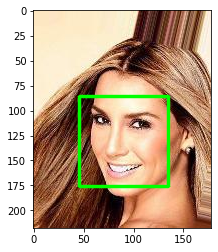

In [ ]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

landmark의 위치

Object keypoint estimation 알고리즘

[Annotated Facial Landmarks in the Wild (AFLW)](https://www.tugraz.at/institute/icg/research/team-bischof/lrs/downloads/aflw/)

Dlib은 ibug 300-W 데이터셋으로 학습한 pretrained model 을 제공한다.

[ibug 300-W](https://ibug.doc.ic.ac.uk/)

[Facial point annotations](https://ibug.doc.ic.ac.uk/resources/facial-point-annotations)

In [ ]:
model_path = '/content/drive/MyDrive/LMS/Mustache/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [ ]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


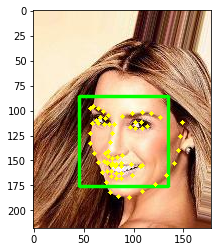

In [ ]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#스티커 적용 위치 확인

고양이 수염이 적용 될 위치를 landmark를 사용해서 계산해 주세요.
<br/>코 끝인 33 번보다 좋은 위치가 있을 거예요.

ibug 300w 데이터셋은 68개를 사용한다.

In [ ]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(75, 141)
(x,y) : (75,96)
(w,h) : (90,90)


#스티커 적용

In [ ]:
sticker_path = '/content/drive/MyDrive/LMS/cat mustache.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(90, 90, 3)


png에 대한 설명

In [ ]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (30,6)


1) 스티커 위치

$$ x = x_{nose}$$

$$y = y_{nose} - \frac{height}{2}$$


2) 스티커 크기

$$width = height = width_{bbox}$$

In [ ]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (30,6)


(1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.

In [ ]:
def stick(img_a):
  sticker_area = img_a[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
  img_a[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
    #black = 255, white = 0 (control)
  plt.imshow(img_a)
  plt.show()

In [ ]:
def restore_image(path):
  global img_bgr
  img_bgr = cv2.imread(path, 1)
  img_bgr = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
  plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
  plt.show()

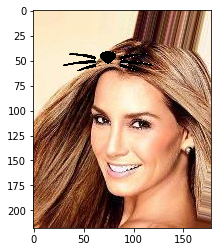

In [ ]:
stick(img_bgr)

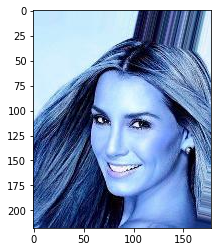

In [ ]:
restore_image(my_image_path)

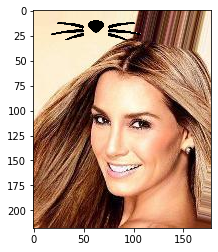

In [ ]:
stick(img_bgr)

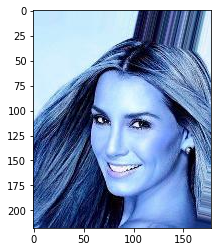

In [ ]:
restore_image(my_image_path)

(2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요?
<br/>스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다.
<br/>opencv 의 cv2.addWeighted() 를 참고하세요.

오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.

* 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
* 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
* 실행 속도가 중요할까요?
* 스티커앱을 만들 때 정확도가 얼마나 중요할까요?